In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import scipy.sparse as sp
import numpy as np
import torch 
from recommandation_propre import *
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt

torch.set_default_tensor_type('torch.DoubleTensor')

# Préliminaires

In [2]:
def loadMovieLens(path='/data/movielens'):
    # Get movie titles
    movies={}
    for line in open(path+'/u.item'):
        (id,title)=line.split('|')[0:2]
        movies[id]=title
    # Load data
    prefs ={}
    for line in open(path+'/u.data'):
        (user,movieid,rating,ts)=line.split('\t')
        prefs.setdefault(user,{})
        prefs[user][movies[movieid]]=float(rating)
    return prefs

In [3]:
data = loadMovieLens('./ml-100k')

In [4]:
new = {}
for dic in data:
    new[int(dic)]=data[dic]

In [5]:
df = pd.DataFrame(new)

In [6]:
mtx = sp.csr_matrix(df.replace(np.nan, 0).values)

In [7]:
mtx

<1664x943 sparse matrix of type '<class 'numpy.float64'>'
	with 99693 stored elements in Compressed Sparse Row format>

# Visualisation des données

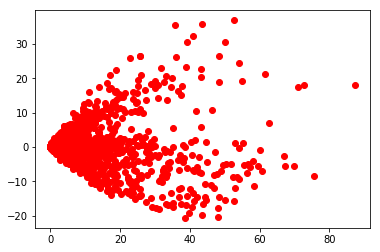

In [8]:
svd_films = TruncatedSVD()
svd_films.fit(mtx)
red_mtx_films = svd_films.fit_transform(mtx)

plt.plot(red_mtx_films[:,0],red_mtx_films[:,1],'ro')
plt.show()

[0.15435838 0.04821754]


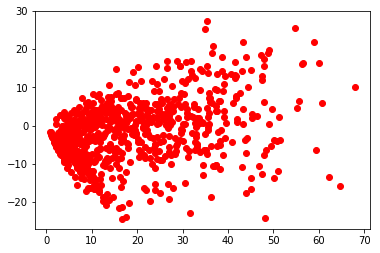

In [9]:
svd_users = TruncatedSVD()
svd_users.fit(mtx.transpose())
red_mtx_users = svd_users.fit_transform(mtx.transpose())

print(svd_users.explained_variance_ratio_)

plt.plot(red_mtx_users[:,0],red_mtx_users[:,1],'ro')
plt.show()

#  Set de données

In [11]:
df_train ,test = cut_train_test(df)

length test : 2606.0
ration test/train: 0.02614025056924759


#  Base Line

In [13]:
rec_rand = Recommandation()
rec_rand.random_score(test, rel_error)

,0
count,2606.000000
mean,0.755180
std,1.009282
min,0.000000
25%,0.250000
50%,0.500000
75%,0.750000
max,5.000000


In [15]:
note_mean = df_train.mean().mean()

In [17]:
rec_cst = Recommandation()
rec_cst.cst_score(test,note_mean, rel_error)

,0
count,2606.000000
mean,0.564469
std,0.795023
min,0.102055
25%,0.102055
50%,0.197260
75%,0.795890
max,2.591779


# Question 1

In [18]:
model_svd = TruncatedSVD(n_components=25,n_iter=2)
rec_syst_svd = Recommandation(model_svd)
rec_syst_svd.fit(df_train)

In [19]:
rec_syst_svd.score(test, rel_error)

,0
count,2606.000000
mean,0.548273
std,0.854237
min,0.000000
25%,0.000000
50%,0.250000
75%,0.500000
max,3.000000


# Question 2

In [ ]:
model_nmf = NMF(n_components=25, init='random', random_state=0)
rec_syst_nmf = Recommandation(model_nmf)
rec_syst_nmf.fit(df_train)

In [ ]:
rec_syst_nmf.score(test, rel_error)

#  Question 3

Source : https://tel.archives-ouvertes.fr/tel-01005223/document

## Sans L2

In [ ]:
dim = 2
epsilon = 1e-5
reg_q = 0
reg_p = 0
max_iter = 100

In [ ]:
rec_syst = Recommandation()
cost = rec_syst.fit_SGD_stoch(df_train, dim, epsilon, reg_q, reg_p, max_iter,test)

plt.plot(range(len(cost)),cost)
plt.show()

In [133]:
rec_syst.score(test, rel_error)

,0
count,2469.000000
mean,0.914945
std,0.829984
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,3.000000


## Avec L2

In [ ]:
dim = 2
epsilon = 1e-5
reg_q = 100
reg_p = 100
max_iter = 100

In [ ]:
rec_syst = Recommandation()
cost = rec_syst.fit_SGD_stoch(df_train, dim, epsilon, reg_q, reg_p, max_iter,test)

plt.plot(range(len(cost)),cost)
plt.show()

In [147]:
rec_syst.score(test)

,0
count,2469.000000
mean,0.880518
std,0.776413
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,3.000000
